In [2]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import file csv
vgsales = pd.read_csv("vgsales.csv")

# Data Inspection

In [3]:
# Check size row and column if df
vgsales.shape

(16598, 11)

In [4]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
vgsales.count

<bound method DataFrame.count of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sa

In [6]:
# Top 5 row of df
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
# Data type of attributes
vgsales.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [8]:
# Number of nulls
vgsales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
# Descriptive Analyse
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [10]:
# Check for duplicate rows
duplicates = vgsales.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# Show the duplicate rows
duplicate_rows = vgsales[duplicates]
print("Duplicate rows:")
print(duplicate_rows)

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []


# Data Analysis

## Highest sales from each of region.

In [11]:
# Highest sales in North America
highest_na_sales = vgsales['NA_Sales'].max()
print("Highest sales in North America:", highest_na_sales)

# Highest sales in Europe
highest_eu_sales = vgsales['EU_Sales'].max()
print("Highest sales in Europe:", highest_eu_sales)

# Highest sales in Japan
highest_jp_sales = vgsales['JP_Sales'].max()
print("Highest sales in Japan:", highest_jp_sales)

# Highest sales in Other regions
highest_other_sales = vgsales['Other_Sales'].max()
print("Highest sales in Other regions:", highest_other_sales)

# Highest global sales
highest_global_sales = vgsales['Global_Sales'].max()
print("Highest global sales:", highest_global_sales)

Highest sales in North America: 41.49
Highest sales in Europe: 29.02
Highest sales in Japan: 10.22
Highest sales in Other regions: 10.57
Highest global sales: 82.74


## Relationship between each regions by game sales

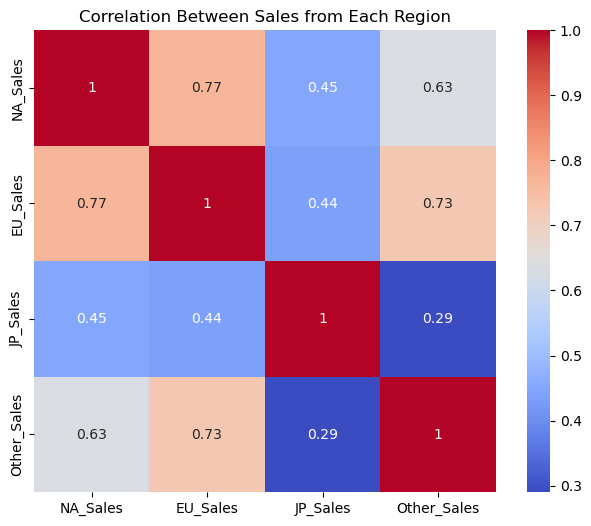

             NA_Sales  EU_Sales  JP_Sales  Other_Sales
NA_Sales     1.000000  0.767727  0.449787     0.634737
EU_Sales     0.767727  1.000000  0.435584     0.726385
JP_Sales     0.449787  0.435584  1.000000     0.290186
Other_Sales  0.634737  0.726385  0.290186     1.000000


In [12]:
# Select the sales columns
sales_regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Calculate the correlation matrix
sales_correlation = vgsales[sales_regions].corr()

# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(sales_correlation, annot=True, cmap="coolwarm", square=True)

# Set the plot title
plt.title("Correlation Between Sales from Each Region")

# Display the correlation heatmap
plt.show()
print(sales_correlation)

NA_Sales:
- There is a strong positive correlation of 1.000000 between NA_Sales.
- NA_Sales has a moderately strong positive correlation with EU_Sales (0.767727), JP_Sales (0.449787), and Other_Sales (0.634737). 
- These values suggest that higher sales in the North American region are associated with higher sales in the European, Japanese, and other regions.

EU_Sales:

- EU_Sales also has a strong positive correlation of 1.000000 with itself.
- EU_Sales has a moderately strong positive correlation with NA_Sales (0.767727), JP_Sales (0.435584), and Other_Sales (0.726385). 
- This indicates that higher sales in the European region are associated with higher sales in the North American, Japanese, and other regions.

JP_Sales:

- JP_Sales has a positive correlation of 1.000000 with itself.
- JP_Sales has a weaker positive correlation with NA_Sales (0.449787), EU_Sales (0.435584), and Other_Sales (0.290186). 
- This suggests a comparatively weaker relationship between sales in the Japanese region and sales in other regions.

Other_Sales:

- Other_Sales has a positive correlation of 1.000000 with itself.
- Other_Sales has a moderately strong positive correlation with NA_Sales (0.634737), EU_Sales (0.726385), and a weaker positive correlation with JP_Sales (0.290186). 
- This indicates that higher sales in other regions (outside of North America, Europe, and Japan) are associated with higher sales in those three regions.

Thus, the sales from all regions generally have positive correlations which indicate that higher sales in one region tend to be associated with higher sales in other regions. The strongest correlations are observed between NA_Sales and EU_Sales, followed by NA_Sales and Other_Sales, and EU_Sales and Other_Sales. The correlation between JP_Sales and the other regions is comparatively weaker.

## Highest game sales by genre.

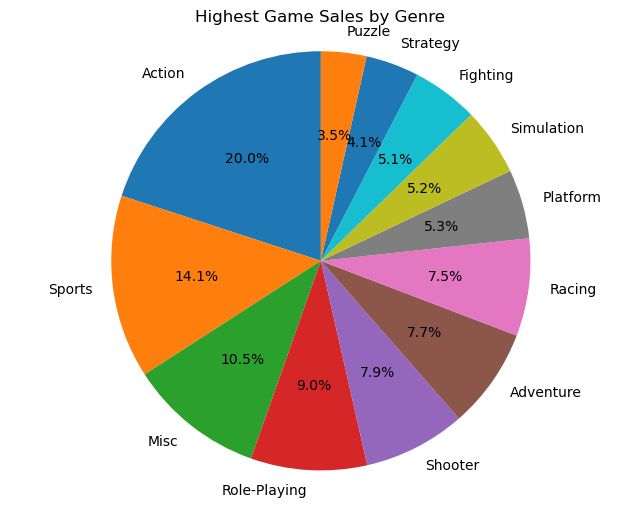

In [13]:
# Calculate genre totals
genre_totals = vgsales['Genre'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(genre_totals, labels=genre_totals.index, autopct='%1.1f%%', startangle=90)
plt.title("Highest Game Sales by Genre")
plt.axis('equal')

# Display the pie chart
plt.show()

As you can see that most highest game genre ever release and sold is action genre games.
Following with second highest is misc genre games.
As the third highest is almost tight with the second is role-playing genre games.

## Highest game sales from global sales by game platform.

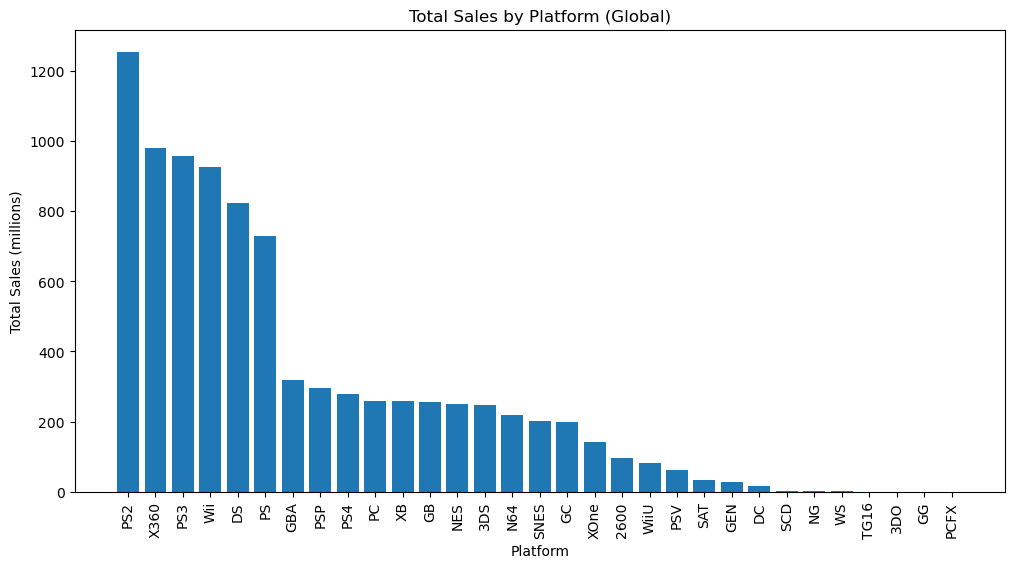

In [14]:
# Group the data by platform and calculate the total sales
platform_sales = vgsales.groupby('Platform')['Global_Sales'].sum()

# Sort the platform_sales series in descending order
platform_sales = platform_sales.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(platform_sales.index, platform_sales.values)
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales by Platform (Global)')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

- Highest total game sales of all time is PS2 console platform.
- X360 platform became the second highest sales which neck to neck with the third highest sales which is PS3 console platform.

## Relationship game platform between years.

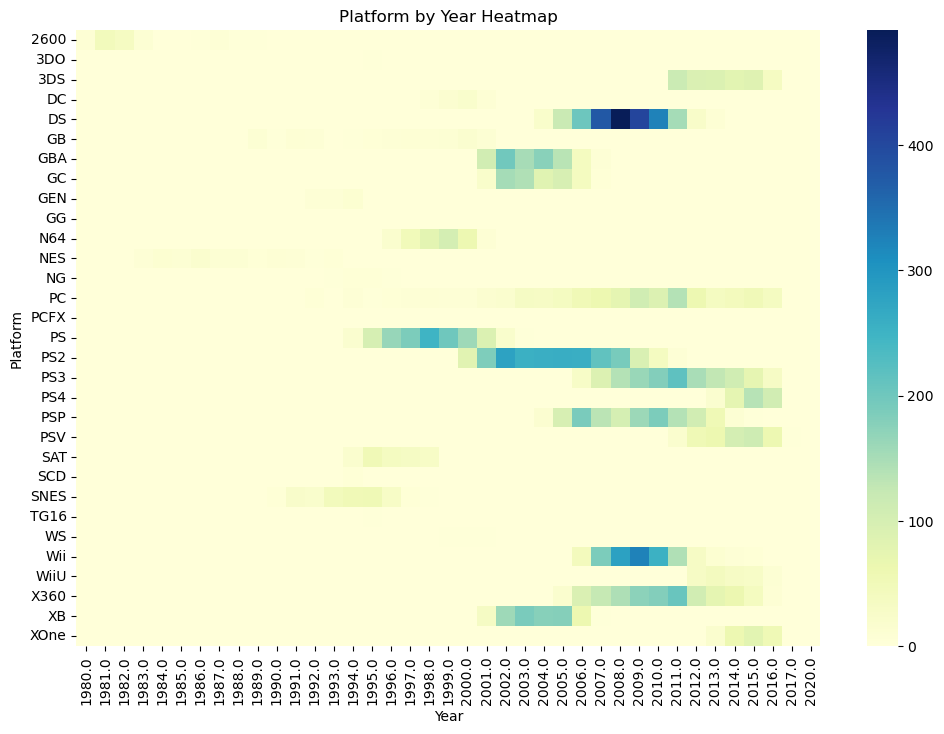

In [18]:
# Create a cross-tabulation table of Platform and Year
cross_tab = pd.crosstab(vgsales['Platform'], vgsales['Year'])

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='YlGnBu')
plt.title('Platform by Year Heatmap')
plt.xlabel('Year')
plt.ylabel('Platform')
plt.show()

- DS platform have more frequent buyer and higher sales than other platforms at year of 2007 until 2009.
- PS2 platform can be seen able to maintain a stable game sales between 2002 until 2006.

## Most game creation by publishers.

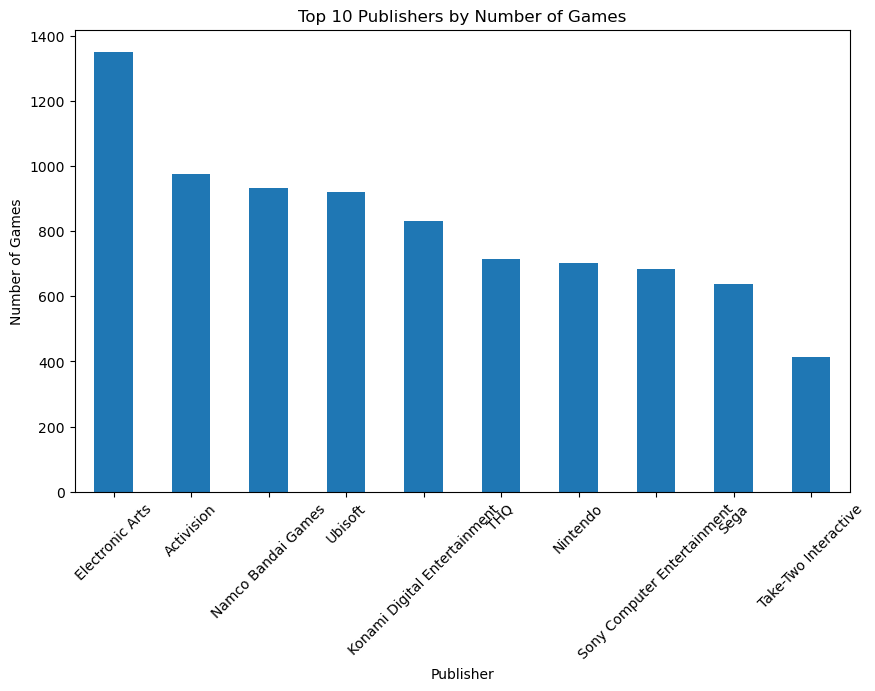

In [19]:
# Group the data by 'Publisher' and count the number of games
publisher_counts = vgsales['Publisher'].value_counts()

# Get the top 10 publishers
top_10_publishers = publisher_counts.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
top_10_publishers.plot(kind='bar')
plt.title('Top 10 Publishers by Number of Games')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.show()

- EA known as Electronic Arts publisher has create and sales more games thah others publisher.
- Second highest of game creation is Activision publisher which come neck to neck with Namcom Bandai publisher and Ubisoft publisher.
- Third highest will be Namco Bandai publisher and come along with the forth is Ubisoft publisher.

## Most succesful of game publisher. 

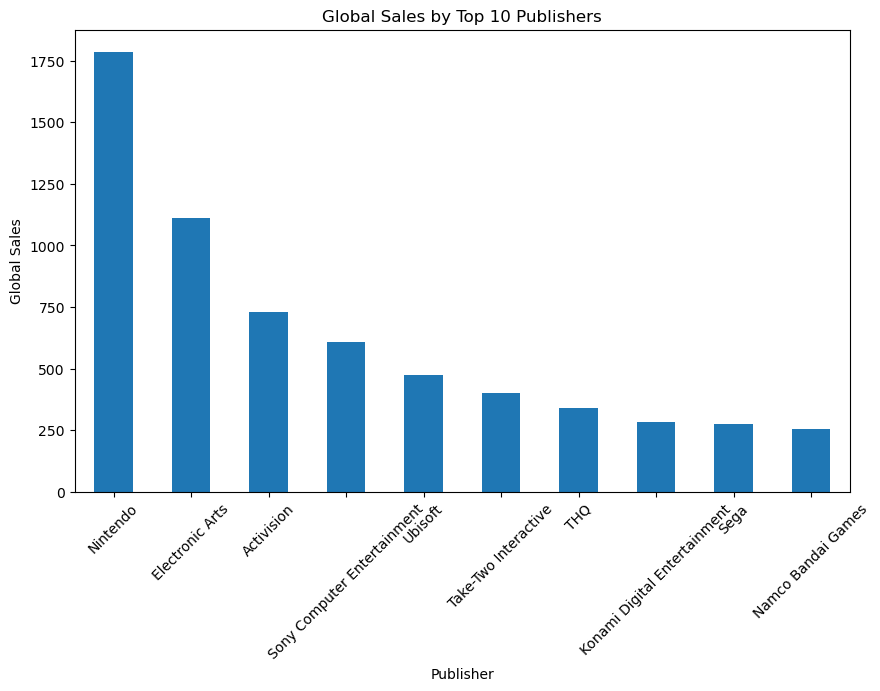

In [23]:
# Group the data by 'Publisher' and calculate the sum of global sales
publisher_sales = vgsales.groupby('Publisher')['Global_Sales'].sum()

# Sort the publishers by global sales in descending order
sorted_publishers = publisher_sales.sort_values(ascending=False)

# Select the top 10 publishers
top_10_publishers = sorted_publishers.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_publishers.plot(kind='bar')
plt.title('Global Sales by Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

- Nintendo publisher have made a lot of game sales than other publisher even though they not created many games.
- Then, second successful publisher is Electronic Arts publisher where they create many games which able to gain a sales even been beat by Nintendo publisher.